In [1]:
from networkit import *
%matplotlib inline
import matplotlib.pyplot as plt
import time
from sklearn import *
import numpy as np
import random
from cython import *
import pylab

No module named 'seaborn'


In [2]:
cd ~/Thesis/NetworKit-Esders

/home/xza/Thesis/NetworKit-Esders


In [3]:
def drawROC(indexName, predictions):
    X, Y = roc.getCurve(predictions)
    plt.suptitle(indexName, fontsize=18, fontweight="bold")
    plt.xticks([z / 10 for z in range(11)])
    plt.yticks([z / 10 for z in range(11)])
    plt.xlabel("False positive rate", fontsize=18)
    plt.ylabel("True positive rate", fontsize=18)
    plt.axis([0, 1, 0, 1])
    curve, = plt.plot(X, Y)
    plt.plot([0, 1], [0, 1], 'grey', ls='--')
def saveROC(indexName, predictions):
    X, Y = roc.getCurve(predictions)
    plt.suptitle(indexName, fontsize=18, fontweight="bold")
    plt.xticks([z / 10 for z in range(11)])
    plt.yticks([z / 10 for z in range(11)])
    plt.xlabel("False positive rate", fontsize=18)
    plt.ylabel("True positive rate", fontsize=18)
    plt.axis([0, 1, 0, 1])
    curve, = plt.plot(X, Y)
    plt.plot([0, 1], [0, 1], 'grey', ls='--')
    filepath = folder + '/' + graphname + '/' + indexName.replace(" ", "_").replace("/", "-") + '_TT-' + methodTT + "_FT-" + methodFT + "_labeled" + ".png"
    #print(filepath)
    pylab.savefig(filepath, dpi=300, bbox_inches='tight')
def drawPR(indexName, predictions):
    X, Y = pr.getCurve(predictions)
    plt.suptitle(indexName, fontsize=14, fontweight="bold")
    plt.xticks([z / 10 for z in range(11)])
    plt.yticks([z / 10 for z in range(11)])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.axis([0, 1, 0, 1])
    curve, = plt.plot(X, Y, label=indexName)
    plt.legend(handles=[curve])
def drawROCs(supTitle, **args):
    predictions = args["predictions"]
    indexNames = args["indexNames"]
    plt.suptitle(supTitle, fontsize=14, fontweight="bold")
    plt.xticks([z / 10 for z in range(11)])
    plt.yticks([z / 10 for z in range(11)])
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.axis([0, 1, 0, 1])
    plt.plot([0, 1], [0, 1], '#aaaaaa', ls='--')
    handles = []
    for i in range(0, len(indexNames)):
        X, Y = roc.getCurve(predictions[i])
        curve, = plt.plot(X, Y, label=indexNames[i])
        handles.append(curve)
    plt.legend(handles=handles, loc=4, fontsize=10)

In [4]:
testGraph, trainingGraph, featureGraph = linkprediction.readTestTrainFeature("input/out.ca-cit-HepTh", 0.1, 0.3)
#testGraph = readGraph("input/jazz.graph", Format.METIS)
#linkprediction.fixGML("input/cond-mat-2005.gml")
graphname = "jazz"
folder = "/home/xza/Thesis/thesis/imgs/experiments"
f = open(folder + "/" + graphname + "/" + "AUCs.txt", 'w')
#testGraph = readGraph("input/cond-mat-2005.gml_new", Format.GML)

In [5]:
testGraph.numberOfEdges()

2444798

In [6]:
roc = linkprediction.ROCMetric(testGraph)
pr = linkprediction.PrecisionRecallMetric(testGraph)

In [7]:
methodTT = "balanced-2hop-0.9"
methodFT = "balanced-2hop-60k-max"

Wir wählen jetzt x% der Kanten als Trainings-Set.

In [8]:
trainingGraph = linkprediction.TrainingGraphSampler.byPercentage(testGraph, 0.9)
testGraph.numberOfEdges() - trainingGraph.numberOfEdges()

244480

In [9]:
featureGraph = linkprediction.TrainingGraphSampler.byPercentage(trainingGraph, 0.7)
trainingGraph.numberOfEdges() - featureGraph.numberOfEdges()

660096

In [ ]:
# TRAIN-POSITIVES
featureGraphEdges = featureGraph.edges()
deltaFeatureTrainGraph = Graph(trainingGraph)
for e in featureGraphEdges:
    deltaFeatureTrainGraph.removeEdge(e[0], e[1])
positives = deltaFeatureTrainGraph.edges()

positives = linkprediction.MissingLinksFinder(featureGraph).findPositives(2, trainingGraph)
if len(positives) > 30000:
    random.shuffle(positives)
    positives = positives[:30000]
print("#positives =", len(positives))
    
# TRAIN-NEGATIVES
negatives = []
# Just enough so that we can extract 25k negatives
twoHops = linkprediction.MissingLinksFinder(featureGraph).findRandomly(2, len(positives) + 10000)
i = 0
while (len(negatives) < len(positives)):
    e = twoHops[i]
    if not trainingGraph.hasEdge(e[0], e[1]):
        negatives.append(e)
    i += 1
nodePairsTrain = negatives + positives
nodePairsTrain.sort()
print("#train =", len(nodePairsTrain))

In [8]:
# TRAIN-POSITIVES
featureGraphEdges = featureGraph.edges()
deltaFeatureTrainGraph = Graph(trainingGraph)
for e in featureGraphEdges:
    deltaFeatureTrainGraph.removeEdge(e[0], e[1])
positives = deltaFeatureTrainGraph.edges()

positives = linkprediction.MissingLinksFinder(featureGraph).findPositives(2, trainingGraph)
if len(positives) > 30000:
    random.shuffle(positives)
    positives = positives[:30000]
print("#positives =", len(positives))

#positives = 30000


In [ ]:
negs = linkprediction.MissingLinksFinder(featureGraph).findRandomNegatives(2, len(positives), trainingGraph)

In [11]:
# TEST-POSITIVES
positives = linkprediction.MissingLinksFinder(trainingGraph).findPositives(2, testGraph)
if len(positives) > 50000:
    random.shuffle(positives)
    positives = positives[:50000]
print("#positives =", len(positives))
# TEST-NEGATIVES
negatives = []
twoHops = linkprediction.MissingLinksFinder(trainingGraph).findRandomly(2, len(positives) + 10000)
i = 0
while (len(negatives) < len(positives)):
    e = twoHops[i]
    if not trainingGraph.hasEdge(e[0], e[1]):
        negatives.append(e)
    i += 1
nodePairsTest = negatives + positives
nodePairsTest.sort()
print("#test =", len(nodePairsTest))

#positives = 50000
#test = 100000


In [12]:
featureKatzIndex = linkprediction.KatzIndex(featureGraph, 5, 0.005)
featureCommonNeighborsIndex = linkprediction.CommonNeighborsIndex(featureGraph)
featureJaccardIndex = linkprediction.JaccardIndex(featureGraph)
featurePreferentialAttachmentIndex = linkprediction.PreferentialAttachmentIndex(featureGraph)
featureAdamicAdarIndex = linkprediction.AdamicAdarIndex(featureGraph)
featureUDegreeIndex = linkprediction.UDegreeIndex(featureGraph)
featureVDegreeIndex = linkprediction.VDegreeIndex(featureGraph)
featureAlgebraicDistanceIndex = linkprediction.AlgebraicDistanceIndex(featureGraph, 5, 15)
featureAlgebraicDistanceIndex.preprocess()
featureReversedNeighborhoodDistanceIndex = linkprediction.ReversedNeighborhoodDistanceIndex(featureGraph)
featureTotalNeighborsIndex = linkprediction.TotalNeighborsIndex(featureGraph)
featureNeighborsMeasureIndex = linkprediction.NeighborsMeasureIndex(featureGraph)
featureSameCommunityIndex = linkprediction.SameCommunityIndex(featureGraph)
featureAdjustedRandIndex = linkprediction.AdjustedRandIndex(featureGraph)
featureResourceAllocationIndex = linkprediction.ResourceAllocationIndex(featureGraph)

katzIndex = linkprediction.KatzIndex(trainingGraph, 5, 0.005)
commonNeighborsIndex = linkprediction.CommonNeighborsIndex(trainingGraph)
jaccardIndex = linkprediction.JaccardIndex(trainingGraph)
preferentialAttachmentIndex = linkprediction.PreferentialAttachmentIndex(trainingGraph)
adamicAdarIndex = linkprediction.AdamicAdarIndex(trainingGraph)
uDegreeIndex = linkprediction.UDegreeIndex(trainingGraph)
vDegreeIndex = linkprediction.VDegreeIndex(trainingGraph)
algebraicDistanceIndex = linkprediction.AlgebraicDistanceIndex(trainingGraph, 5, 15)
algebraicDistanceIndex.preprocess()
reversedNeighborhoodDistanceIndex = linkprediction.ReversedNeighborhoodDistanceIndex(trainingGraph)
totalNeighborsIndex = linkprediction.TotalNeighborsIndex(trainingGraph)
neighborsMeasureIndex = linkprediction.NeighborsMeasureIndex(trainingGraph)
sameCommunityIndex = linkprediction.SameCommunityIndex(trainingGraph)
adjustedRandIndex = linkprediction.AdjustedRandIndex(trainingGraph)
resourceAllocationIndex = linkprediction.ResourceAllocationIndex(trainingGraph)

In [13]:
featureLinkPredictors = (featureCommonNeighborsIndex, featureJaccardIndex, featureAdamicAdarIndex, featurePreferentialAttachmentIndex, featureUDegreeIndex, featureVDegreeIndex, featureAlgebraicDistanceIndex, featureReversedNeighborhoodDistanceIndex, featureTotalNeighborsIndex, featureSameCommunityIndex, featureResourceAllocationIndex, featureAdjustedRandIndex)
linkPredictors = (commonNeighborsIndex, jaccardIndex, adamicAdarIndex, preferentialAttachmentIndex, uDegreeIndex, vDegreeIndex, algebraicDistanceIndex, reversedNeighborhoodDistanceIndex, totalNeighborsIndex, sameCommunityIndex, resourceAllocationIndex, adjustedRandIndex)

In [14]:
labelTrain = linkprediction.getClasses(nodePairsTrain, trainingGraph)
featureTrain = linkprediction.getSamples(nodePairsTrain, *featureLinkPredictors)
print("#Positives(train) =", sum(labelTrain))

#Positives(train) = 30000


In [15]:
labelTest = linkprediction.getClasses(nodePairsTest, testGraph)
featureTest = linkprediction.getSamples(nodePairsTest, *linkPredictors)
print("#Positives(test) =", sum(labelTest))

#Positives(test) = 50000


In [16]:
#dtc = ensemble.AdaBoostClassifier(n_estimators=100)
#dtc = ensemble.RandomForestClassifier()
#dtc = naive_bayes.GaussianNB()

In [17]:
print("#EDGES  =", "{:,}".format(len(nodePairsTest)))
f.write(graphname + "\n")
f.write("  NUM-EDGES(FEATURE / TRAIN / TEST) = " + str(featureGraph.numberOfEdges()) + " / " + str(trainingGraph.numberOfEdges()) + " / " + str(testGraph.numberOfEdges()) + "\n\n")

#EDGES  = 100,000


67

RUNTIME-FIT  = 1.24s
RUNTIME-PRED = 0.75s
AUC          = 0.9729


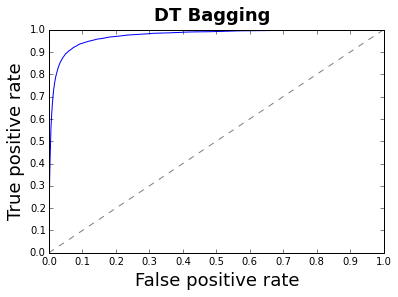

In [18]:
f.write("DT-Bagging\n")
dtc = ensemble.BaggingClassifier(n_estimators=25, max_features=0.2, n_jobs=-1)
startTime = time.time()
dtc.fit(featureTrain, labelTrain)
f.write("  RUNTIME-FIT  = " + "{:.2f}".format(time.time() - startTime) + "s\n")
print("RUNTIME-FIT  = %ss" % "{:.2f}".format(time.time() - startTime))
startTime = time.time()
supPreds = dtc.predict_proba(featureTest)
f.write("  RUNTIME-PRED = " + "{:.2f}".format(time.time() - startTime) + "s\n")
print("RUNTIME-PRED = %ss" % "{:.2f}".format(time.time() - startTime))
predLabelTest = [pred[1] for pred in supPreds]
fpr, tpr, thresholds = metrics.roc_curve(labelTest, predLabelTest)
plt.suptitle("DT Bagging", fontsize=18, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("False positive rate", fontsize=18)
plt.ylabel("True positive rate", fontsize=18)
plt.axis([0, 1, 0, 1])
curve, = plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'grey', ls='--')
filepath = folder + '/' + graphname + '/DT-Bagging_TT-' + methodTT + "_FT-" + methodFT + "_labeled" + ".png"
pylab.savefig(filepath, dpi=300, bbox_inches='tight')
f.write("  AUC          = " + "{:.4f}".format(metrics.roc_auc_score(labelTest, predLabelTest)) + "\n\n")
print("AUC          =", "{:.4f}".format(metrics.roc_auc_score(labelTest, predLabelTest)))

RUNTIME-FIT  = 3.68s
RUNTIME-PRED = 0.63s
AUC          = 0.9787


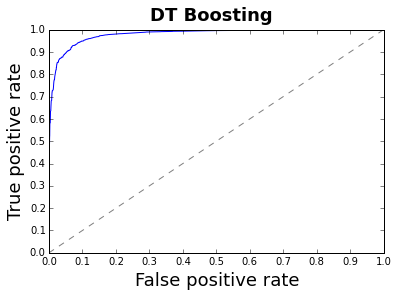

In [19]:
f.write("DT-Boosting\n")
dtc = ensemble.AdaBoostClassifier(n_estimators=50)
startTime = time.time()
dtc.fit(featureTrain, labelTrain)
f.write("  RUNTIME-FIT  = " + "{:.2f}".format(time.time() - startTime) + "s\n")
print("RUNTIME-FIT  = %ss" % "{:.2f}".format(time.time() - startTime))
startTime = time.time()
supPreds = dtc.predict_proba(featureTest)
f.write("  RUNTIME-PRED = " + "{:.2f}".format(time.time() - startTime) + "s\n")
print("RUNTIME-PRED = %ss" % "{:.2f}".format(time.time() - startTime))
predLabelTest = [pred[1] for pred in supPreds]
fpr, tpr, thresholds = metrics.roc_curve(labelTest, predLabelTest)
plt.suptitle("DT Boosting", fontsize=18, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("False positive rate", fontsize=18)
plt.ylabel("True positive rate", fontsize=18)
plt.axis([0, 1, 0, 1])
curve, = plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'grey', ls='--')
filepath = folder + '/' + graphname + '/DT-Boosting_TT-' + methodTT + "_FT-" + methodFT + "_labeled" + ".png"
pylab.savefig(filepath, dpi=300, bbox_inches='tight')
f.write("  AUC          = " + "{:.4f}".format(metrics.roc_auc_score(labelTest, predLabelTest)) + "\n\n")
print("AUC          =", "{:.4f}".format(metrics.roc_auc_score(labelTest, predLabelTest)))

RUNTIME-FIT  = 0.01s
RUNTIME-PRED = 0.03s
AUC          = 0.8953


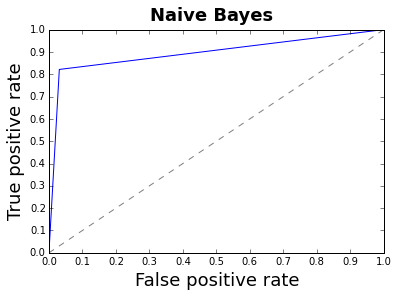

In [20]:
f.write("Naive Bayes\n")
dtc = naive_bayes.GaussianNB()
startTime = time.time()
dtc.fit(featureTrain, labelTrain)
f.write("  RUNTIME-FIT  = " + "{:.2f}".format(time.time() - startTime) + "s\n")
print("RUNTIME-FIT  = %ss" % "{:.2f}".format(time.time() - startTime))
startTime = time.time()
predLabelTest = dtc.predict(featureTest)
f.write("  RUNTIME-PRED = " + "{:.2f}".format(time.time() - startTime) + "s\n")
print("RUNTIME-PRED = %ss" % "{:.2f}".format(time.time() - startTime))
fpr, tpr, thresholds = metrics.roc_curve(labelTest, predLabelTest)
plt.suptitle("Naive Bayes", fontsize=18, fontweight="bold")
plt.xticks([z / 10 for z in range(11)])
plt.yticks([z / 10 for z in range(11)])
plt.xlabel("False positive rate", fontsize=18)
plt.ylabel("True positive rate", fontsize=18)
plt.axis([0, 1, 0, 1])
curve, = plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'grey', ls='--')
filepath = folder + '/' + graphname + '/Naive-Bayes_TT-' + methodTT + "_FT-" + methodFT + "_labeled" + ".png"
pylab.savefig(filepath, dpi=300, bbox_inches='tight')
f.write("  AUC          = " + "{:.4f}".format(metrics.roc_auc_score(labelTest, predLabelTest)) + "\n\n")
print("AUC          =", "{:.4f}".format(metrics.roc_auc_score(labelTest, predLabelTest)))

100000
100000
0
100000
RUNTIME = 0.42s
AUC     = 0.9218


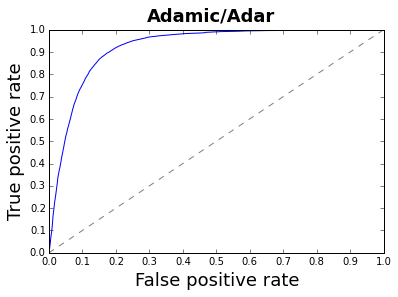

In [21]:
# Adamic/Adar
f.write("Adamic/Adar\n")
startTime = time.time()
predictions = adamicAdarIndex.runOnParallel(nodePairsTest)
print(len(predictions))
nulls = []
for i in range(len(predictions) - 1,-1,-1):
    if predictions[i][1] == 0:
        nulls.append(predictions[i])
        del predictions[i]
random.shuffle(nulls)
print(len(predictions))
print(len(nulls))
predictions += nulls
print(len(predictions))



f.write("  RUNTIME = " + "{:.2f}".format(time.time() - startTime) + "s\n")
print("RUNTIME = %ss" % "{:.2f}".format(time.time() - startTime))
saveROC("Adamic/Adar", predictions)
f.write("  AUC     = " + "{:.4f}".format(roc.getAreaUnderCurve()) + "\n\n")
print("AUC     =", "{:.4f}".format(roc.getAreaUnderCurve()))

RUNTIME = 2.37s
AUC     = 0.9708


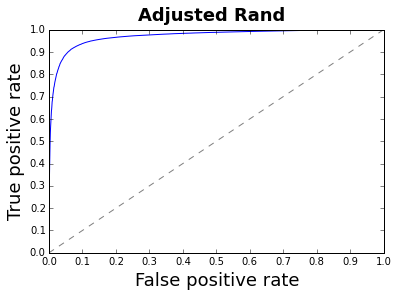

In [22]:
# Adjusted Rand
f.write("Adjusted Rand\n")
startTime = time.time()
predictions = adjustedRandIndex.runOnParallel(nodePairsTest)
f.write("  RUNTIME = " + "{:.2f}".format(time.time() - startTime) + "s\n")
print("RUNTIME = %ss" % "{:.2f}".format(time.time() - startTime))
saveROC("Adjusted Rand", predictions)
f.write("  AUC     = " + "{:.4f}".format(roc.getAreaUnderCurve()) + "\n\n")
print("AUC     =", "{:.4f}".format(roc.getAreaUnderCurve()))

RUNTIME = 0.37s
AUC     = 0.9102


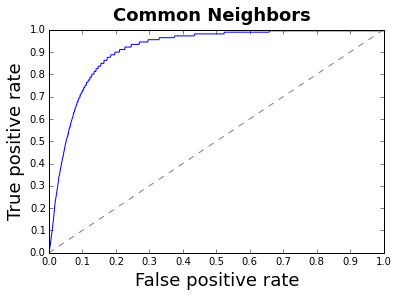

In [23]:
# Common Neighbors
f.write("Common Neighbors\n")
startTime = time.time()
predictions = commonNeighborsIndex.runOnParallel(nodePairsTest)
f.write("  RUNTIME = " + "{:.2f}".format(time.time() - startTime) + "s\n")
print("RUNTIME = %ss" % "{:.2f}".format(time.time() - startTime))
saveROC("Common Neighbors", predictions)
f.write("  AUC     = " + "{:.4f}".format(roc.getAreaUnderCurve()) + "\n\n")
print("AUC     =", "{:.4f}".format(roc.getAreaUnderCurve()))

RUNTIME = 0.58s
AUC     = 0.9750


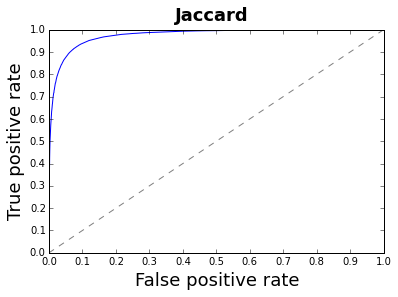

In [24]:
# Jaccard
f.write("Jaccard\n")
startTime = time.time()
predictions = jaccardIndex.runOnParallel(nodePairsTest)
f.write("  RUNTIME = " + "{:.2f}".format(time.time() - startTime) + "s\n")
print("RUNTIME = %ss" % "{:.2f}".format(time.time() - startTime))
saveROC("Jaccard", predictions)
f.write("  AUC     = " + "{:.4f}".format(roc.getAreaUnderCurve()) + "\n\n")
print("AUC     =", "{:.4f}".format(roc.getAreaUnderCurve()))

In [ ]:
# Neighbors-Measure
f.write("Neighbors-Measure\n")
startTime = time.time()
predictions = neighborsMeasureIndex.runOnParallel(nodePairsTest)
f.write("  RUNTIME = " + "{:.2f}".format(time.time() - startTime) + "s\n")
print("RUNTIME = %ss" % "{:.2f}".format(time.time() - startTime))
saveROC("Neighbors-Measure", predictions)
f.write("  AUC     = " + "{:.4f}".format(roc.getAreaUnderCurve()) + "\n\n")
print("AUC     =", "{:.4f}".format(roc.getAreaUnderCurve()))

RUNTIME = 0.11s
AUC     = 0.5426


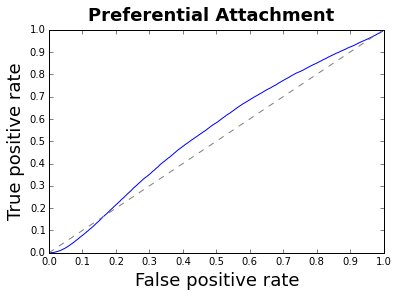

In [25]:
# Preferential Attachment
f.write("Preferential Attachment\n")
startTime = time.time()
predictions = preferentialAttachmentIndex.runOnParallel(nodePairsTest)
f.write("  RUNTIME = " + "{:.2f}".format(time.time() - startTime) + "s\n")
print("RUNTIME = %ss" % "{:.2f}".format(time.time() - startTime))
saveROC("Preferential Attachment", predictions)
f.write("  AUC     = " + "{:.4f}".format(roc.getAreaUnderCurve()) + "\n\n")
print("AUC     =", "{:.4f}".format(roc.getAreaUnderCurve()))

RUNTIME = 0.32s
AUC     = 0.9260


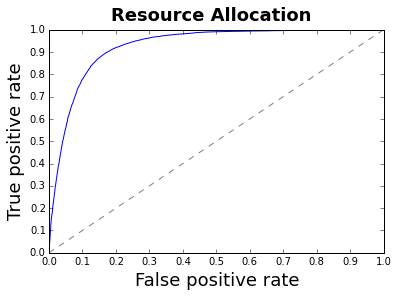

In [26]:
# Resource Allocation
f.write("Resource Allocation\n")
startTime = time.time()
predictions = resourceAllocationIndex.runOnParallel(nodePairsTest)
f.write("  RUNTIME = " + "{:.2f}".format(time.time() - startTime) + "s\n")
print("RUNTIME = %ss" % "{:.2f}".format(time.time() - startTime))
saveROC("Resource Allocation", predictions)
f.write("  AUC     = " + "{:.4f}".format(roc.getAreaUnderCurve()) + "\n\n")
print("AUC     =", "{:.4f}".format(roc.getAreaUnderCurve()))

RUNTIME = 0.35s
AUC     = 0.9753


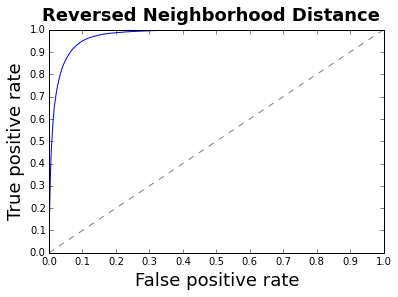

In [27]:
# Reversed Neighborhood Distance
f.write("Reversed Neighborhood Distance\n")
startTime = time.time()
predictions = reversedNeighborhoodDistanceIndex.runOnParallel(nodePairsTest)
f.write("  RUNTIME = " + "{:.2f}".format(time.time() - startTime) + "s\n")
print("RUNTIME = %ss" % "{:.2f}".format(time.time() - startTime))
saveROC("Reversed Neighborhood Distance", predictions)
f.write("  AUC     = " + "{:.4f}".format(roc.getAreaUnderCurve()) + "\n\n")
print("AUC     =", "{:.4f}".format(roc.getAreaUnderCurve()))

RUNTIME = 79.29s
AUC     = 0.7469


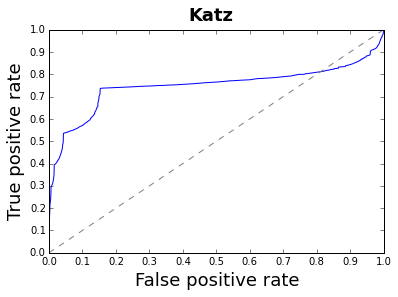

In [86]:
# Katz
f.write("Katz\n")
startTime = time.time()
predictions = katzIndex.runOnParallel(nodePairsTest)
f.write("  RUNTIME = " + "{:.2f}".format(time.time() - startTime) + "s\n")
print("RUNTIME = %ss" % "{:.2f}".format(time.time() - startTime))
saveROC("Katz", predictions)
f.write("  AUC     = " + "{:.4f}".format(roc.getAreaUnderCurve()) + "\n\n")
print("AUC     =", "{:.4f}".format(roc.getAreaUnderCurve()))

In [28]:
f.close()